## Pip Config

In [ ]:
! pip install transformers
! pip install datasets
! pip install qiskit
! pip install pytorch_lightning==1.9.4
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.9 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.5 MB/s eta 0:00:00

## Augumentation Config

 Definitions of augumentation methods. Ultimately unused, as it was deemed that keeping OprnQASM2 code normalized (meaning leaving it with , provided by the generation function of Qiskit `0.39.4`) led to better results.

In [ ]:
from qiskit.qasm import Qasm
from qiskit.qasm.node import *

def gen_qasm(self):
    if isinstance(self, Barrier):
        return "barrier " + gen_qasm(self.children[0]) + ";"
    elif isinstance(self, BinaryOp):
        return (
            "(" + gen_qasm(self.children[1]) + self.children[0].value + gen_qasm(self.children[2]) + ")"
        )
    elif isinstance(self, BinaryOperator):
        return self.value
    elif isinstance(self, Cnot):
        return "CX " + gen_qasm(self.children[0]) + "," + gen_qasm(self.children[1]) + ";"
    elif isinstance(self, Creg):
        return "creg " + gen_qasm(self.id) + ";"
    elif isinstance(self, CustomUnitary):
        string = self.name
        if self.arguments is not None:
            string += "(" + gen_qasm(self.arguments) + ")"
        string += " " + gen_qasm(self.bitlist) + ";"
        return string
    elif isinstance(self, ExpressionList):
        return ",".join([gen_qasm(self.children[j]) for j in range(self.size())])
    elif isinstance(self, External):
        return gen_qasm(self.children[0]) + "(" + gen_qasm(self.children[1]) + ")"
    elif isinstance(self, Format):
        return f"{self.language} {self.version()};"
    elif isinstance(self, Gate):
        string = "gate " + self.name
        if self.arguments is not None:
            string += "(" + gen_qasm(self.arguments) + ")"
        string += " " + gen_qasm(self.bitlist) + "\n"
        string += "{\n" + gen_qasm(self.body) + "}"
        return string
    elif isinstance(self, GateBody):
        string = ""
        for children in self.children:
            string += "  " + gen_qasm(children) + "\n"
        return string
    elif isinstance(self, Id):
        return self.name
    elif isinstance(self, IdList):
        return ",".join([gen_qasm(self.children[j]) for j in range(self.size())])
    elif isinstance(self, If):
        return (
            "if("
            + gen_qasm(self.children[0])
            + "=="
            + str(self.children[1].value)
            + ") "
            + gen_qasm(self.children[2])
        )
    elif isinstance(self, IndexedId):
        return self.name + "[%d]" % self.index
    elif isinstance(self, Int):
        return "%d" % self.value
    elif isinstance(self, Measure):
        return "measure " + gen_qasm(self.children[0]) + " -> " + gen_qasm(self.children[1]) + ";"
    elif isinstance(self, Opaque):
        string = "opaque %s" % self.name
        if self.arguments is not None:
            string += "(" + gen_qasm(self.arguments) + ")"
        string += " " + gen_qasm(self.bitlist) + ";"
        return string
    elif isinstance(self, Prefix):
        return self.children[0].value + "(" + gen_qasm(self.children[1]) + ")"
    elif isinstance(self, PrimaryList):
        return ",".join([gen_qasm(self.children[j]) for j in range(self.size())])
    elif isinstance(self, Program):
        string = ""
        for children in self.children:
            string += gen_qasm(children) + "\n"
        return string
    elif isinstance(self, Qreg):
        return "qreg " + gen_qasm(self.id) + ";"
    elif isinstance(self, Real):
        return str(float(self.value))
    elif isinstance(self, Reset):
        return "reset " + gen_qasm(self.children[0]) + ";"
    elif isinstance(self, UnaryOperator):
        return self.value
    elif isinstance(self, UniversalUnitary):
        return "U(" + gen_qasm(self.children[0]) + ") " + gen_qasm(self.children[1]) + ";"


from qiskit.qasm import Qasm
from qiskit.qasm.node import *

# Hack to remove 'include "qelib1.inc"' gates
# modifies the original programNode
def remove_qelib_inc(programNode):
    del programNode.children[1:43]
    return programNode

def readd_qelib_inc(qasmCode):
    return qasmCode.replace("OPENQASM 2.0;", "OPENQASM 2.0; include \"qelib1.inc\";")

def renameTransformation(programNode):
    programNode = remove_qelib_inc(programNode)

    def uniqueIds(node):
        idsFound = []
        for child in node.children:
            if isinstance(child, Creg) or isinstance(child, Qreg):
                indexedIdNode = child.children[0]
                idNode = indexedIdNode.children[0]
                idsFound += [idNode.name]
            else:
                idsFound += uniqueIds(child)
        return idsFound

    # mapping : srcName -> destName
    def renames(node, mapping):
        for child in node.children:
            if isinstance(child, Id):
                if child.name in mapping:
                    child.name = mapping[child.name]
            # indexed id has its own name field,
            # which messes with the generation of IndexedId
            elif isinstance(child, IndexedId):
                if child.name in mapping:
                    child.name = mapping[child.name]
                renames(child, mapping)
            else:
                renames(child, mapping)

    ids = uniqueIds(programNode)
    mapping = {}
    for i in range(1, len(ids), 2):
        mapping[ids[i]] = ids[i-1]
        mapping[ids[i-1]] = ids[i]

    renames(programNode, mapping)
    return programNode

# may break on custom gates (Gate, Opaque, GateBody)
def swapTransformation(programNode):
    independent_sets = []
    current_independent = []

    def get_children_ids(node):
        ids = [] # coded in str (c, -1) for all, (c, 0) for int
        if isinstance(node, IndexedId):
            idName = node.children[0].name
            intNum = node.children[1].value
            ids.append((idName, intNum))
            return ids
        elif isinstance(node, Id):
            idName = node.name
            intNum = -1
            ids.append((idName, intNum))
            return ids
        for child in node.children:
            if isinstance(child, IndexedId):
                idName = child.children[0].name
                intNum = child.children[1].value
                ids.append((idName, intNum))
            elif isinstance(child, Id):
                idName = child.name
                intNum = -1
                ids.append((idName, intNum))
            else:
                ids += get_children_ids(child)
        return ids

    def handle_dependence(node):
        nonlocal current_independent
        if isinstance(node, CustomUnitary): #quickfix
            if len(node.children) == 3:
                ids = get_children_ids(node.children[2])
            else:
                ids = get_children_ids(node.children[1])
        else:
            ids = get_children_ids(node)
        new_part = (node, ids)
        is_dependent = False
        for cur_node in current_independent:
            for new_id in ids:
                for cur_id in cur_node[1]:
                    if (new_id[1] == -1 and cur_id[0] == new_id[0]) or new_id == cur_id:
                        is_dependent = True
        if(is_dependent):
            independent_sets.append(current_independent)
            current_independent = [new_part]
        else:
            current_independent.append(new_part)

    for child in programNode.children:
        if isinstance(child, Barrier):
            independent_sets += [current_independent, [(child, ())]]
            current_independent = []
        elif isinstance(child, Cnot):
            handle_dependence(child)
        elif isinstance(child, Creg): #TODO
            independent_sets += [current_independent, [(child, ())]]
            current_independent = []
        elif isinstance(child, CustomUnitary):
            handle_dependence(child)
        # elif isinstance(child, External):
        #     handle_dependence(child)
        elif isinstance(child, If): # unsure of scope here (are you able to define a qreg/creg in a body?)
            handle_dependence(child)
        elif isinstance(child, Measure):
            independent_sets += [current_independent, [(child, ())]]
            current_independent = []
        elif isinstance(child, Qreg):
            independent_sets += [current_independent, [(child, ())]]
            current_independent = []
        elif isinstance(child, Reset): # handle id and indexed_id
            handle_dependence(child)
        elif isinstance(child, UniversalUnitary): # handle id and indexed_id
            handle_dependence(child)
        elif isinstance(child, Format):
            independent_sets += [current_independent, [(child, [()])]]
            current_independent = []
        elif isinstance(child, Gate):
            independent_sets += [current_independent, [(child, [()])]]
            current_independent = []
        else: # Throw Error - will error out custom gates
            print("ERROR: ", child)

    independent_sets += [current_independent]

    new_children = []
    for op_list in independent_sets:
        new_children.extend([i[0] for i in reversed(op_list)])
    new_program = Program(new_children)

    return new_program

def prettyfy(str: str):
    return str.replace("\n", " ")

def applyTransformations(str):
    ast = Qasm(data=str).parse()
    programNode = remove_qelib_inc(ast)
    programNode = renameTransformation(programNode)
    programNode = swapTransformation(programNode)
    return readd_qelib_inc(prettyfy(gen_qasm(programNode)))

##Models

In [ ]:
import pytorch_lightning as pl
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    RobertaTokenizer,
    T5ForConditionalGeneration,
    get_linear_schedule_with_warmup,
    T5Tokenizer
)

class T5FineTuner(pl.LightningModule):
  def __init__(self, hparams):
    super(T5FineTuner, self).__init__()
    self.hparams.update(vars(hparams))

    self.model = T5ForConditionalGeneration.from_pretrained(hparams.model_name_or_path)
    self.tokenizer = RobertaTokenizer.from_pretrained(hparams.tokenizer_name_or_path)

  def is_logger(self):
    return self.trainer.global_rank <= 0

  def forward(
      self, input_ids, attention_mask=None, decoder_input_ids=None, decoder_attention_mask=None, labels=None
  ):
    return self.model(
        input_ids,
        attention_mask=attention_mask,
        # decoder_input_ids=decoder_input_ids,
        decoder_attention_mask=decoder_attention_mask,
        labels=labels,
    )

  def _step(self, batch):
    labels = batch["target_ids"]
    labels[labels[:, :] == self.tokenizer.pad_token_id] = -100

    outputs = self(
        input_ids=batch["source_ids"],
        attention_mask=batch["source_mask"],
        labels=labels,
        decoder_attention_mask=batch['target_mask']
    )

    loss = outputs[0]

    return loss

  def training_step(self, batch, batch_idx):
    loss = self._step(batch)

    tensorboard_logs = {"train_loss": loss}
    return {"loss": loss, "log": tensorboard_logs}

  def validation_step(self, batch, batch_idx):
    loss = self._step(batch)
    return {"val_loss": loss}

  def validation_epoch_end(self, outputs):
    avg_loss = torch.stack([x["val_loss"] for x in outputs]).mean()
    tensorboard_logs = {"val_loss": avg_loss}
    return {"avg_val_loss": avg_loss, "log": tensorboard_logs, 'progress_bar': tensorboard_logs}

  def configure_optimizers(self):
    "Prepare optimizer and schedule (linear warmup and decay)"

    model = self.model
    no_decay = ["bias", "LayerNorm.weight"]
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": self.hparams.weight_decay,
        },
        {
            "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
            "weight_decay": 0.0,
        },
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=self.hparams.learning_rate, eps=self.hparams.adam_epsilon)
    self.opt = optimizer
    return [optimizer]

  def train_dataloader(self):
    train_dataset = get_dataset(tokenizer=self.tokenizer, isTrain=True, args=self.hparams)
    dataloader = DataLoader(train_dataset, batch_size=self.hparams.train_batch_size, drop_last=True, shuffle=True, num_workers=4)
    t_total = (
        (len(dataloader.dataset) // (self.hparams.train_batch_size * max(1, self.hparams.n_gpu))) \
        // self.hparams.gradient_accumulation_steps \
        * float(self.hparams.num_train_epochs)
    )
    scheduler = get_linear_schedule_with_warmup(
        self.opt, num_warmup_steps=self.hparams.warmup_steps, num_training_steps=t_total
    )
    self.lr_scheduler = scheduler
    return dataloader

## Load dataset

In [ ]:
import tensorflow as tf
import transformers
from transformers import DistilBertTokenizer, TFBertModel, TFDistilBertForMultipleChoice
from transformers import TFDistilBertForSequenceClassification
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TFGPT2ForSequenceClassification, TFRobertaForSequenceClassification

import json

MODEL_NAME = 'huggingface/CodeBERTa-small-v1'
BATCH_SIZE = 20
N_EPOCHS = 5

In [ ]:
from collections import defaultdict

def read_dataset(x_files, y_files, custom=False):
  task_x = []
  task_y = []
  task_test_x = []
  task_test_y = []

  def read_base_dataset(train_x_files, train_y_files, test_x_files, test_y_files):
    for i in train_x_files:
      with open(i, 'r') as f:
        for line in f:
          task_x.append(line)
    for i in train_y_files:
      with open(i, 'r') as f:
        for line in f:
          task_y.append(line)
    for i in test_x_files:
      with open(i, 'r') as f:
        for line in f:
          task_test_x.append(line)
    for i in test_y_files:
      with open(i, 'r') as f:
        for line in f:
          task_test_y.append(line)

  def read_part_of_dataset(x_file, y_file, labels):
    x_list = []
    y_list = []
    with open(x_file, 'r') as f:
      for line in f:
        x_list.append(line)
    with open(y_file, 'r') as f:
      for line in f:
        y_list.append(line)
    filtered = filter(lambda a: a[1] in labels, zip(x_list, y_list))
    return zip(*filtered)


  read_base_dataset(
      # train_y_files=["./dataset/data1_y.txt", "./dataset/data2_y.txt", "./dataset/data3_y.txt", "./dataset/siz10-1_y.txt", "./dataset/siz10-2_y.txt"],
      # train_x_files=["./dataset/data1_x.txt", "./dataset/data2_x.txt", "./dataset/data3_x.txt", "./dataset/siz10-1_x.txt", "./dataset/siz10-2_x.txt"],
      # train_x_files=["./dataset/siz10-1_x.txt", "./dataset/siz10-2_x.txt"],
      # train_y_files=["./dataset/siz10-1_y.txt", "./dataset/siz10-2_y.txt"],
      # train_x_files=["./dataset/custom_train_1_x.txt", "./dataset/custom_train_2_x.txt"],
      # train_y_files=["./dataset/custom_train_1_y.txt", "./dataset/custom_train_2_y.txt"],
      train_x_files=x_files,
      train_y_files=y_files,
      test_x_files=[],
      test_y_files=[]
  )

  # custom only
  ###
  def divide(label):
    ret_str = ''
    for i in label[:-1]: # removes \n
      ret_str += i
      ret_str += ' '
    return ret_str[:-1]
  task_y = [divide(i) for i in task_y]

  # filtered = [i for i in range(len(task_y)) if task_y[i] == '0 0 0 0 0' and i % 7 != 0]
  # task_x = [task_x[i] for i in range(len(task_x)) if i not in filtered]
  # task_y = [task_y[i] for i in range(len(task_y)) if i not in filtered]

  ###
  # non custom only
  if not custom:
    task_y = [int(i) for i in task_y]

  import random
  random.seed(13)
  test_elems = random.sample(range(len(task_x)), 2000 if not custom else 200)

  task_x_a = [task_x[i] for i in range(len(task_x)) if i not in test_elems]
  task_y_a = [task_y[i] for i in range(len(task_y)) if i not in test_elems]
  task_test_x_a = [task_x[i] for i in test_elems]
  task_test_y_a = [task_y[i] for i in test_elems]

  amounts_train = defaultdict(lambda: 0)
  amounts_test = defaultdict(lambda: 0)
  for i in task_y_a:
    amounts_train[i] += 1
  for i in task_test_y_a:
    amounts_test[i] += 1

  print("Training data distribution:")
  for key, value in amounts_train.items():
    print(" " + str(key) + ":", value)

  print("Test data distribution:")
  for key, value in amounts_test.items():
    print(" " + str(key) + ":", value)

  return (task_x_a, task_y_a, task_test_x_a, task_test_y_a)


### Selective method

In [ ]:
print("depth")
task_depth_x_a, task_depth_y_a, task_depth_test_x_a, task_depth_test_y_a = read_dataset(
  x_files=["./dataset/siz10-1_train_x.txt", "./dataset/siz10-2_train_x.txt"],
  y_files=["./dataset/siz10-1_train_depth_y.txt", "./dataset/siz10-2_train_depth_y.txt"]
)

print("\ncnot")
task_control_x_a, task_control_y_a, task_control_test_x_a, task_control_test_y_a = read_dataset(
  x_files=["./dataset/siz10-1_train_x.txt", "./dataset/siz10-2_train_x.txt"],
  y_files=["./dataset/siz10-1_train_control_y.txt", "./dataset/siz10-2_train_control_y.txt"]
)

print("\nsum")
task_sum_x_a, task_sum_y_a, task_sum_test_x_a, task_sum_test_y_a = read_dataset(
  x_files=["./dataset/siz10-1_train_x.txt", "./dataset/siz10-2_train_x.txt"],
  y_files=["./dataset/siz10-1_train_sum_y.txt", "./dataset/siz10-2_train_sum_y.txt"]
)

depth
Training data distribution:
 0: 3746
 1: 14244
Test data distribution:
 1: 1596
 0: 404

cnot
Training data distribution:
 0: 8536
 1: 9454
Test data distribution:
 1: 1054
 0: 946

sum
Training data distribution:
 0: 7087
 1: 10903
Test data distribution:
 1: 1210
 0: 790


### Compositive method

In [ ]:
print("\ndepth")
custom_depth_x_a, custom_depth_y_a, custom_depth_test_x_a, custom_depth_test_y_a = read_dataset(
  # x_files=["./dataset/siz10-1_custom_train_x.txt", "./dataset/siz10-2_custom_train_x.txt"],
  # y_files=["./dataset/siz10-1_custom_train_depth_y.txt", "./dataset/siz10-2_custom_train_depth_y.txt"],
  x_files=["./dataset/custom_train_x.txt"],
  y_files=["./dataset/custom_train_depth_y.txt"],
  custom = True
)

print("\ncnot")
custom_control_x_a, custom_control_y_a, custom_control_test_x_a, custom_control_test_y_a = read_dataset(
  # x_files=["./dataset/siz10-1_custom_train_x.txt", "./dataset/siz10-2_custom_train_x.txt"],
  # y_files=["./dataset/siz10-1_custom_train_control_y.txt", "./dataset/siz10-2_custom_train_control_y.txt"],
  x_files=["./dataset/custom_train_x.txt"],
  y_files=["./dataset/custom_train_control_y.txt"],
  custom = True
)

print("\nsum")
custom_sum_x_a, custom_sum_y_a, custom_sum_test_x_a, custom_sum_test_y_a = read_dataset(
  # x_files=["./dataset/siz10-1_custom_train_x.txt", "./dataset/siz10-2_custom_train_x.txt"],
  # y_files=["./dataset/siz10-1_custom_train_sum_y.txt", "./dataset/siz10-2_custom_train_sum_y.txt"],
  x_files=["./dataset/custom_train_x.txt"],
  y_files=["./dataset/custom_train_sum_y.txt"],
  custom = True
)


depth
Training data distribution:
 0 1 0: 949
 0 1 1: 2306
 0 0 1: 270
 1 1 0: 63
Test data distribution:
 0 1 1: 115
 0 1 0: 65
 0 0 1: 15
 1 1 0: 5

cnot
Training data distribution:
 1 1 0: 786
 1 0 1: 841
 0 1 0: 156
 1 0 0: 416
 1 1 1: 1193
 0 1 1: 196
Test data distribution:
 1 1 1: 65
 1 0 1: 49
 1 1 0: 48
 0 1 0: 11
 1 0 0: 19
 0 1 1: 8

sum
Training data distribution:
 0 1 0: 373
 0 1 1: 1367
 1 1 0: 648
 1 1 1: 978
 0 0 1: 86
 1 0 1: 136
Test data distribution:
 1 1 1: 66
 1 1 0: 39
 0 1 1: 63
 0 0 1: 6
 0 1 0: 20
 1 0 1: 6


#CodeBERTa Learning

In [ ]:
def train_codeberta(x, y, test_x, test_y):
  model = TFRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2, from_pt=True)

  tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

  # tokenize the text
  train_encodings = tokenizer(list(x), truncation=True, padding=True)
  test_encodings = tokenizer(list(test_x), truncation=True, padding=True)

  train_dataset2 = tf.data.Dataset.from_tensor_slices((dict(train_encodings),
                                      list(y)))
  test_dataset2 = tf.data.Dataset.from_tensor_slices((dict(test_encodings),
                                      list(test_y)))

  # chose the optimizer
  optimizerr = tf.keras.optimizers.Adam(learning_rate=5e-5)

  # define the loss function
  losss2 = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizerr, loss=losss2, metrics=['accuracy'])

  # train the model
  history = model.fit(train_dataset2.shuffle(len(x)).batch(BATCH_SIZE), epochs=N_EPOCHS, batch_size=BATCH_SIZE)

  return (model, history, test_dataset2)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

def predict_and_score(test_y, model, history, test_dataset):
  y_pred = []

  test = model.predict(test_dataset.batch(1)).logits
  for a in test:
    y_pred.append(int(np.argmax(a)))

  print(classification_report(test_y, y_pred))
  print(accuracy_score(test_y, y_pred))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['loss'])
  plt.title('Model accuracy/loss')
  plt.ylabel('Accuracy/Loss')
  plt.xlabel('Epoch')
  plt.legend(['accuracy', 'loss'], loc='upper left')
  plt.show()

  return y_pred


In [ ]:
from sklearn.metrics import confusion_matrix

def show_confusion_matrix(test_y, y_pred):
  conf_matrix = confusion_matrix(y_true=test_y, y_pred=y_pred)
  fig, ax = plt.subplots(figsize=(7.5, 7.5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i, s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  labels = ["L3_QBO_L3", "QPO-RPO"]
  ax.set_xticklabels(['']+labels)
  ax.set_yticklabels(['']+labels)

  plt.xlabel('Predictions', fontsize=14)
  plt.ylabel('Actuals', fontsize=14)
  # plt.title('Confusion Matrix', fontsize=30)
  plt.show()


In [ ]:
def save_predictions(filename, predictions):
  with open(filename, 'w') as f:
    for prediction in predictions:
      f.write(str(prediction) + "\n")

# save_predictions("./codeberta-res.txt", y_pred)

## Depth

In [ ]:
depth_model, depth_hist, depth_test_dataset = \
  train_codeberta(task_depth_x_a, task_depth_y_a, task_depth_test_x_a, task_depth_test_y_a)

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
900/900 [==============================] - 168s 155ms/step - loss: 0.4403 - accuracy: 0.7988
Epoch 2/5
900/900 [==============================] - 130s 144ms/step - loss: 0.4048 - accuracy: 0.8120
Epoch 3/5
900/900 [==============================] - 128s 143ms/step - loss: 0.3841 - accuracy: 0.8232
Epoch 4/5
900/900 [==============================] - 129s 143ms/step - loss: 0.3676 - accuracy: 0.8321
Epoch 5/5
900/900 [==============================] - 129s 143ms/step - loss: 0.3444 - accuracy: 0.8443


2000/2000 [==============================] - 26s 12ms/step
              precision    recall  f1-score   support

           0       0.57      0.26      0.36       404
           1       0.84      0.95      0.89      1596

    accuracy                           0.81      2000
   macro avg       0.70      0.61      0.62      2000
weighted avg       0.78      0.81      0.78      2000

0.8105


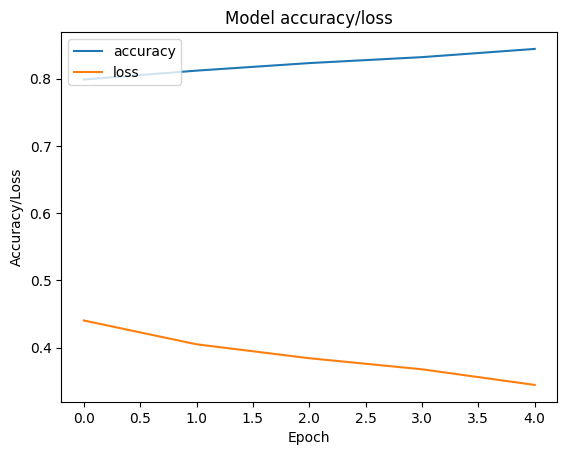

In [ ]:
y_depth_pred = predict_and_score(task_depth_test_y_a, depth_model, depth_hist, depth_test_dataset)

<ipython-input-19-c667df9bf2a3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-19-c667df9bf2a3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


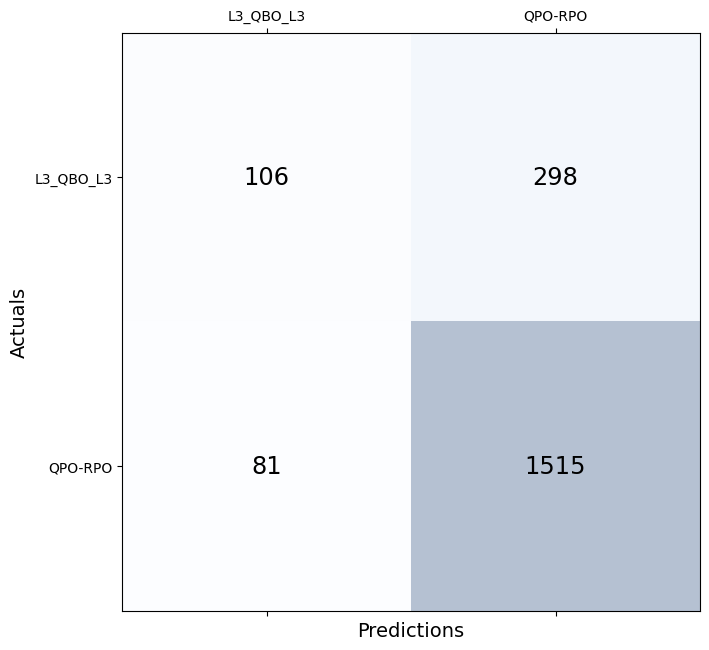

In [ ]:
show_confusion_matrix(task_depth_test_y_a, y_depth_pred)

## CNOT amount

In [ ]:
control_model, control_hist, control_test_dataset = \
  train_codeberta(task_control_x_a, task_control_y_a, task_control_test_x_a, task_control_test_y_a)

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
900/900 [==============================] - 159s 151ms/step - loss: 0.4960 - accuracy: 0.7752
Epoch 2/5
900/900 [==============================] - 129s 143ms/step - loss: 0.4366 - accuracy: 0.7986
Epoch 3/5
900/900 [==============================] - 129s 143ms/step - loss: 0.4052 - accuracy: 0.8160
Epoch 4/5
900/900 [==============================] - 128s 143ms/step - loss: 0.3893 - accuracy: 0.8268
Epoch 5/5
900/900 [==============================] - 129s 143ms/step - loss: 0.3663 - accuracy: 0.8386


2000/2000 [==============================] - 26s 12ms/step
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       946
           1       0.85      0.75      0.80      1054

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000

0.797


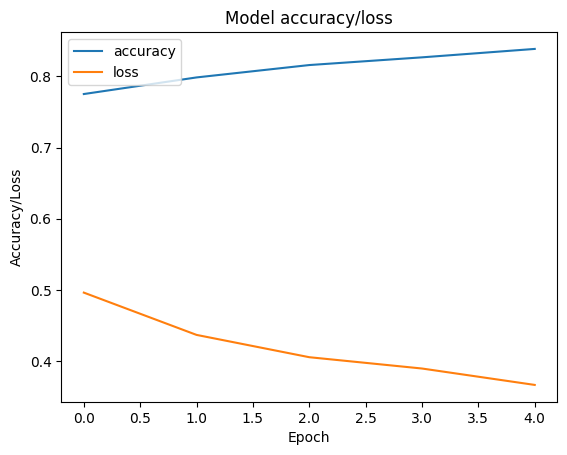

In [ ]:
y_control_pred = predict_and_score(task_control_test_y_a, control_model, control_hist, control_test_dataset)

<ipython-input-19-c667df9bf2a3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-19-c667df9bf2a3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


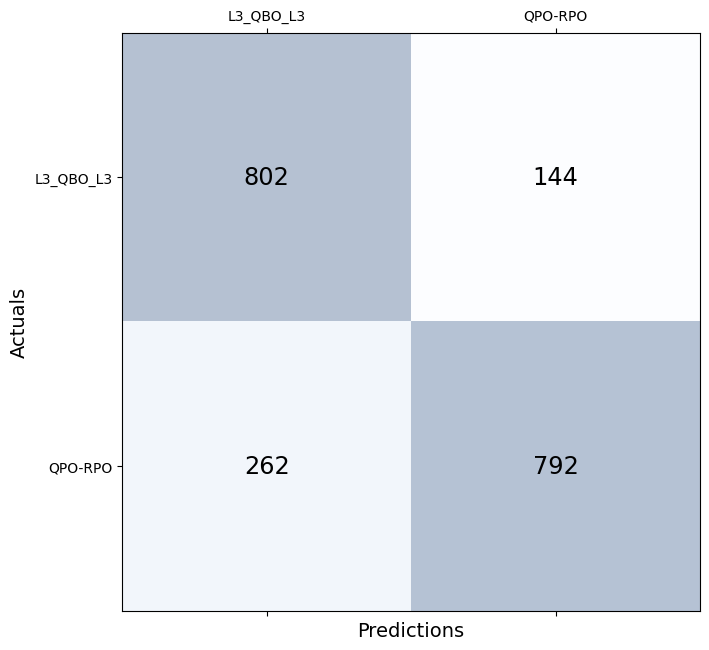

In [ ]:
show_confusion_matrix(task_control_test_y_a, y_control_pred)

## Depth + CNOT amount

In [ ]:
sum_model, sum_hist, sum_test_dataset = \
  train_codeberta(task_sum_x_a, task_sum_y_a, task_sum_test_x_a, task_sum_test_y_a)

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
900/900 [==============================] - 159s 151ms/step - loss: 0.5053 - accuracy: 0.7394
Epoch 2/5
900/900 [==============================] - 129s 144ms/step - loss: 0.4529 - accuracy: 0.7757
Epoch 3/5
900/900 [==============================] - 128s 143ms/step - loss: 0.4265 - accuracy: 0.7932
Epoch 4/5
900/900 [==============================] - 129s 143ms/step - loss: 0.4025 - accuracy: 0.8109
Epoch 5/5
900/900 [==============================] - 129s 143ms/step - loss: 0.3768 - accuracy: 0.8285


2000/2000 [==============================] - 27s 13ms/step
              precision    recall  f1-score   support

           0       0.66      0.83      0.73       790
           1       0.87      0.72      0.79      1210

    accuracy                           0.76      2000
   macro avg       0.76      0.77      0.76      2000
weighted avg       0.78      0.76      0.76      2000

0.762


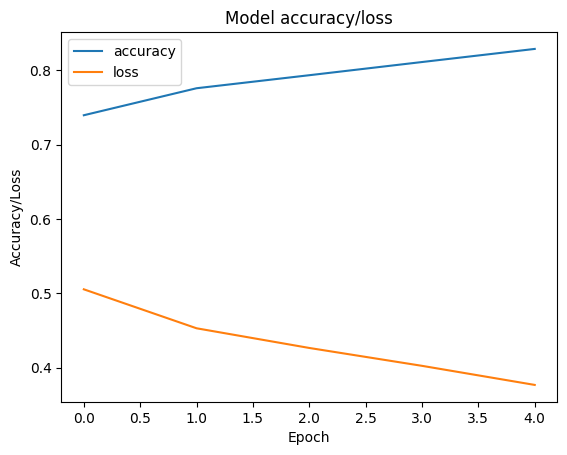

In [ ]:
y_sum_pred = predict_and_score(task_sum_test_y_a, sum_model, sum_hist, sum_test_dataset)

<ipython-input-19-c667df9bf2a3>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-19-c667df9bf2a3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


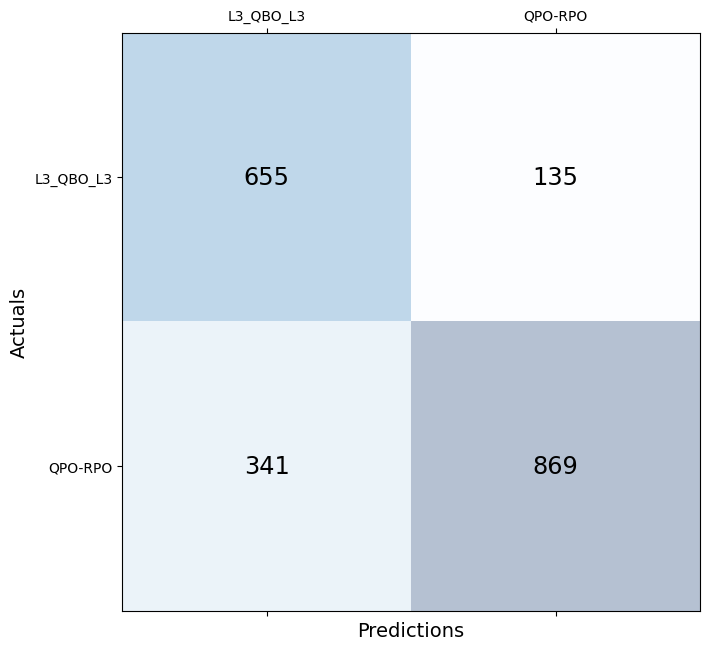

In [ ]:
show_confusion_matrix(task_sum_test_y_a, y_sum_pred)

# CodeT5 Learning

In [ ]:
from torch.utils.data import Dataset
from transformers import AdamW
import logging

logger = logging.getLogger(__name__)

class LoggingCallback(pl.Callback):
  def on_validation_end(self, trainer, pl_module):
    logger.info("***** Validation results *****")
    if pl_module.is_logger():
      metrics = trainer.callback_metrics
      # Log results
      for key in sorted(metrics):
        if key not in ["log", "progress_bar"]:
          logger.info("{} = {}\n".format(key, str(metrics[key])))

  def on_test_end(self, trainer, pl_module):
    logger.info("***** Test results *****")

checkpoint_callback = pl.callbacks.ModelCheckpoint(
    monitor="val_loss", mode="min", save_top_k=5
)

class QasmOptimizerDataset(Dataset):
  def __init__(self, tokenizer, data_x, data_y):
    self.tokenizer = tokenizer

    self.max_len = 512
    # tokenize inputs
    tokenized_inputs = [self.tokenizer(
      x, max_length=self.max_len,
      pad_to_max_length=True,
      return_tensors="pt",
      truncation=True
    ) for x in data_x]

    # tokenize targets
    tokenized_targets = [self.tokenizer(
      str(y), max_length=32, # otherwise 26
      pad_to_max_length=True,
      return_tensors="pt",
      truncation=True
    ) for y in data_y]

    self.inputs = tokenized_inputs
    self.targets = tokenized_targets

  def __len__(self):
    return len(self.inputs)

  def __getitem__(self, index):
    source_ids = self.inputs[index]["input_ids"].squeeze()
    target_ids = self.targets[index]["input_ids"].squeeze()

    src_mask    = self.inputs[index]["attention_mask"].squeeze()
    target_mask = self.targets[index]["attention_mask"].squeeze()

    return {"source_ids": source_ids, "source_mask": src_mask, "target_ids": target_ids, "target_mask": target_mask}

def get_dataset(tokenizer, isTrain, args):
  if isTrain:
    return QasmOptimizerDataset(tokenizer=tokenizer, data_x=args.x, data_y=args.y)
  else:
    return QasmOptimizerDataset(tokenizer=tokenizer, data_x=args.test_x, data_y=args.test_y)


In [ ]:
import argparse
import torch

def train_codeT5(x, y):
  args_dict = dict(
      output_dir="", # path to save the checkpoints
      model_name_or_path='Salesforce/codet5-base',
      tokenizer_name_or_path='Salesforce/codet5-base',
      max_seq_length=512,
      learning_rate=3e-4,
      weight_decay=0.0,
      adam_epsilon=1e-8,
      warmup_steps=0,
      train_batch_size=8,
      eval_batch_size=8,
      num_train_epochs=4,
      gradient_accumulation_steps=8,
      n_gpu=1,
      early_stop_callback=False,
      fp_16=False, # if you want to enable 16-bit training then install apex and set this to true
      opt_level='O1', # you can find out more on optimisation levels here https://nvidia.github.io/apex/amp.html#opt-levels-and-properties
      max_grad_norm=1.0, # if you enable 16-bit training then set this to a sensible value, 0.5 is a good default
      seed=42,

      x = x,
      y = y,
  )

  args = argparse.Namespace(**args_dict)

  train_params = dict(
      accumulate_grad_batches=args.gradient_accumulation_steps,
      gpus=args.n_gpu,
      max_epochs=args.num_train_epochs,
      precision= 16 if args.fp_16 else 32,
      gradient_clip_val=args.max_grad_norm,
      callbacks=[LoggingCallback()],
  )

  model = T5FineTuner(args)
  trainer = pl.Trainer(**train_params)
  trainer.fit(model)
  return (model, args)

In [ ]:
import re
from sklearn.metrics import accuracy_score, classification_report
from transformers import RobertaTokenizer

def save_and_score(filename, model, args, test_x, test_y):
  tokenizer = RobertaTokenizer.from_pretrained(args.tokenizer_name_or_path)
  dataset = QasmOptimizerDataset(tokenizer, test_x, test_y)
  loader = DataLoader(dataset, batch_size=128, shuffle=False)

  pattern = re.compile(r"<pad><s>(.*)</s>")

  predictions = []
  with open(filename, 'w') as f:
    for batch in loader:
      outs = model.model.generate(input_ids=batch['source_ids'],
                                  attention_mask=batch['source_mask'],
                                  max_length=128)
      for out in outs:
        decoded = tokenizer.decode(out)
        prediction = pattern.search(decoded).group(1)
        print(prediction)
        predictions.append(prediction)
        f.write(str(prediction) + "\n")

  print(classification_report(custom_control_test_y_a, predictions))
  print(accuracy_score(custom_control_test_y_a, predictions))
  return predictions

# save_and_score("codet5-res.txt")

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

def show_conf_matrix_custom(test_y, y_pred):
  labels = list(sorted(list(set(test_y + y_pred))))
  conf_matrix = confusion_matrix(y_true=test_y, y_pred=y_pred, labels=labels)
  fig, ax = plt.subplots(figsize=(7.5, 7.5))
  ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
  for i in range(conf_matrix.shape[0]):
      for j in range(conf_matrix.shape[1]):
          ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

  ax.set_xticklabels(['']+labels)
  ax.set_yticklabels(['']+labels)

  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.show()

## Depth

In [ ]:
model_depth, args_depth = train_codeT5(custom_depth_x_a, custom_depth_y_a)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


In [ ]:
depth_pred = save_and_score("depth_custom.txt", model_depth, args_depth, custom_depth_test_x_a, custom_depth_test_y_a)

0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 0
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 1
0 1 1
0 1 1
0 1 1
0 1 0
0 1 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-22-78577cf01c7d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-22-78577cf01c7d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


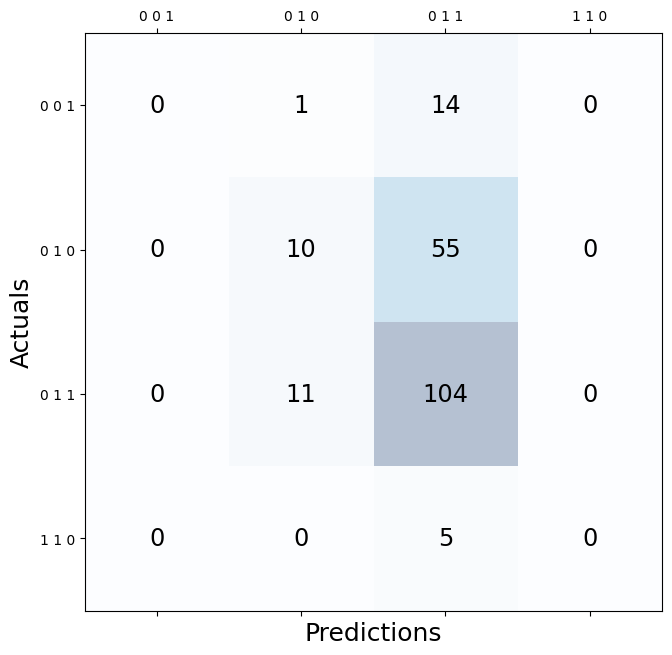

In [ ]:
show_conf_matrix_custom(custom_depth_test_y_a, depth_pred)

## CNOT amount

In [ ]:
model_control, args_control = train_codeT5(custom_control_x_a, custom_control_y_a)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


In [ ]:
control_pred = save_and_score("control_custom.txt", model_control, args_control, custom_control_test_x_a, custom_control_test_y_a)

1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 0
1 1 1
1 1 1
1 1 1
1 1 1
0 1 0
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 0
1 1 1
1 1 1
1 1 1
1 1 1
0 1 0
1 1 1
1 1 1
1 1 1
0 1 0
1 1 1
1 1 1
1 1 1
0 1 0
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 0
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-22-78577cf01c7d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-22-78577cf01c7d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


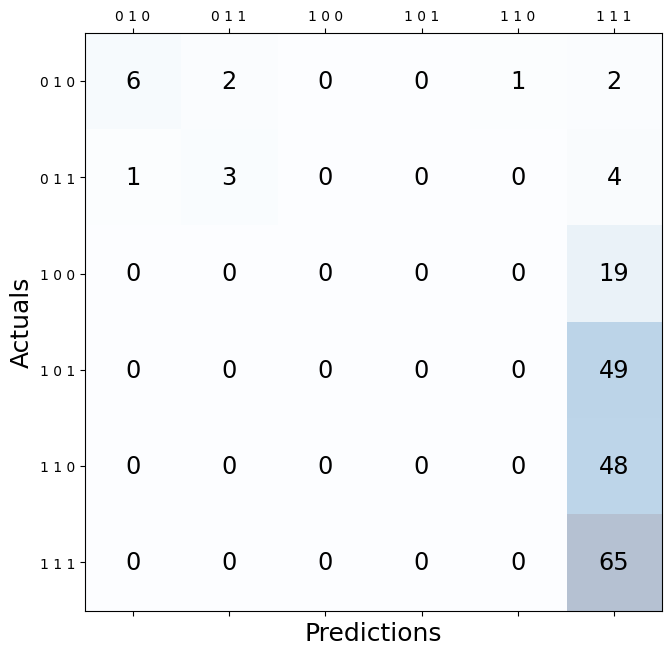

In [ ]:
show_conf_matrix_custom(custom_control_test_y_a, control_pred)

## Depth + CNOT amount

In [ ]:
model_sum, args_sum = train_codeT5(custom_sum_x_a, custom_sum_y_a)

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:478: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/configuration_validator.py:108: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
INFO:pytorch_lightning.utilities.rank_zero:You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set

Training: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=4` reached.


In [ ]:
sum_pred = save_and_score("sum_custom.txt", model_sum, args_sum, custom_sum_test_x_a, custom_sum_test_y_a)

1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
0 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
0 1 1
0 1 1
1 1 1
0 1 1
0 1 1
0 1 1
0 1 0
1 1 1
0 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
0 1 1
0 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
0 1 1
0 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
0 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
0 1 1
0 1 1
1 1 1
0 1 1
1 1 1
0 1 1
0 1 1
0 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
0 1 1
0 1 1
1 1 1
0 1 1
0 1 1
0 1 1
1 1 1
1 1 1
0 1 1
1 1 1
0 1 1
1 1 1
0 1 1
0 1 1
0 1 1
0 1 1
1 1 1
1 1 1
0 1 1
0 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
0 1 1
1 1 1
0 1 1
0 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
0 1 1
0 1 0
1 1 1
1 1 1
0 1 1
1 1 1
0 1 1
1 1 1
1 1 1
1 1 1
1 1 1
0 1 1
1 1 1
1 1 1
0 1 1
1 1 1
0 1 1
0 1 1
1 1 1
0 1 1
0 1 1
1 1 1
1 1 1
0 1 1
0 1 1
0 1 1
1 1 1
0 1 1
1 1 1
0 1 1
0 1 1
1 1 1
0 1 1
1 1 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-22-78577cf01c7d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['']+labels)
<ipython-input-22-78577cf01c7d>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+labels)


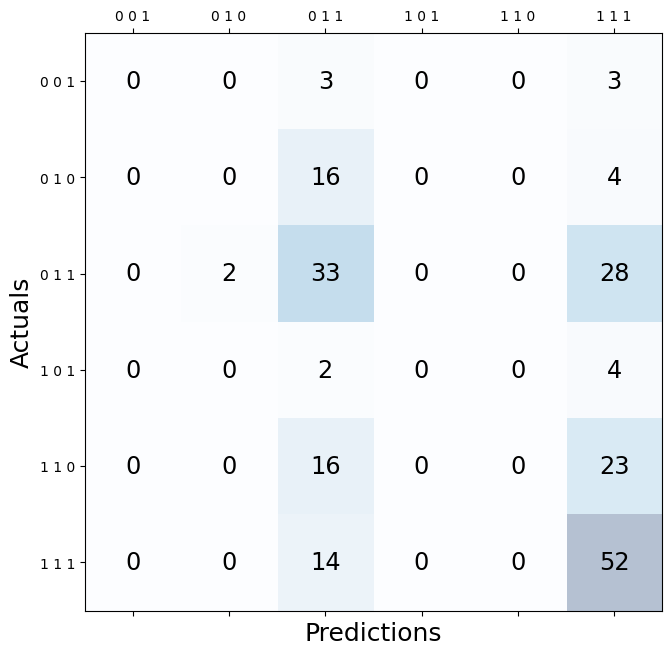

In [ ]:
show_conf_matrix_custom(custom_sum_test_y_a, sum_pred)